In [1]:
import os
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
pancan_rnaseq_df = pd.read_csv('pancan_scaled_zeroone_rnaseq.tsv', index_col=0, sep="\t", low_memory=False)
pancan_rnaseq_df.iloc[:2,:5].head()

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.0
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.0


In [4]:
print(pancan_rnaseq_df.isnull().sum().sum())


4814


In [5]:
pancan_rnaseq_df.dropna(inplace=True)


In [6]:
pancan_rnaseq_df_train, pancan_rnaseq_df_test = train_test_split(pancan_rnaseq_df, test_size=0.1, shuffle=True)
pancan_rnaseq_df_train.shape, pancan_rnaseq_df_test.shape

((1526, 5000), (170, 5000))

In [7]:
encoding_dim = 100
numb_of_features = pancan_rnaseq_df.shape[1]

# Defining the 'Autoencoder' full model
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation="relu", input_shape=(numb_of_features, )))
autoencoder.add(Dense(numb_of_features, activation="sigmoid"))
autoencoder.compile(optimizer="adam", loss='mse')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500100    
                                                                 
 dense_1 (Dense)             (None, 5000)              505000    
                                                                 
Total params: 1005100 (3.83 MB)
Trainable params: 1005100 (3.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
%%time
hist = autoencoder.fit(np.array(pancan_rnaseq_df_train), np.array(pancan_rnaseq_df_train),
                       shuffle=True,
                       epochs=10,
                       batch_size=50,
                       validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 2s 11ms/step - loss: 0.0406 - val_loss: 0.0287
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0260 - val_loss: 0.0227
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.0187
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0170
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.0160
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.0131
CPU times: user 2.

Text(0, 0.5, 'Reconstruction Loss')

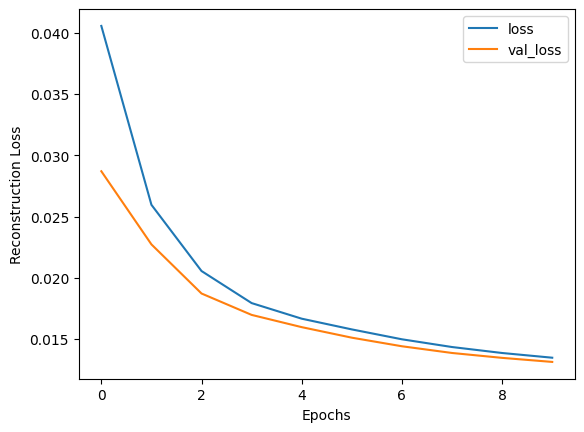

In [9]:
history_df = pd.DataFrame(hist.history)
ax = history_df.plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Reconstruction Loss')

In [10]:
input_sample = pancan_rnaseq_df_test[:1]
input_sample

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-56-7823-01,0.070443,0.420538,0.814224,0.416455,0.551494,0.763475,0.590203,0.544842,0.049308,0.0,...,0.546743,0.213696,0.720559,0.192689,0.261961,0.269613,0.734062,0.0,0.279093,0.743471


In [12]:
reconstruction = autoencoder.predict([input_sample])
reconstruction

1/1 [==============================] - 0s 17ms/step


array([[0.6068453 , 0.11863826, 0.8744409 , ..., 0.04793098, 0.34110734,
        0.5795603 ]], dtype=float32)

In [13]:
reconstruction = autoencoder.predict(np.array(pancan_rnaseq_df))

reconstructed_df = pd.DataFrame(reconstruction, index=pancan_rnaseq_df.index,
                                columns=pancan_rnaseq_df.columns)

reconstructed_df.head()

53/53 [==============================] - 0s 1ms/step


,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.581193,0.376821,0.162838,0.030948,0.011488,0.030239,0.047620,0.024524,0.550208,0.520539,...,0.511282,0.554182,0.715487,0.629359,0.612088,0.364040,0.476375,0.476145,0.195324,0.648879
TCGA-02-0055-01,0.478718,0.312296,0.331145,0.087777,0.047105,0.162272,0.164176,0.075382,0.476882,0.435560,...,0.572019,0.521319,0.652539,0.587546,0.632013,0.389786,0.527087,0.295175,0.181927,0.634845
TCGA-02-2483-01,0.634436,0.368354,0.150023,0.027515,0.010143,0.029257,0.048187,0.022191,0.602317,0.577619,...,0.503576,0.512732,0.701569,0.571966,0.606599,0.372952,0.508804,0.388976,0.237759,0.661332
TCGA-02-2485-01,0.595407,0.353160,0.137932,0.020537,0.007934,0.022265,0.040114,0.015432,0.558641,0.522196,...,0.464667,0.523628,0.697265,0.604741,0.610315,0.358119,0.479519,0.449909,0.189315,0.647360
TCGA-02-2486-01,0.394549,0.321632,0.166583,0.024908,0.012712,0.035573,0.057761,0.026704,0.367732,0.346864,...,0.495001,0.500970,0.597619,0.609358,0.642149,0.389542,0.482264,0.364797,0.132211,0.599295


In [14]:
reconstruction_fidelity = reconstructed_df - pancan_rnaseq_df

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(pancan_rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
gene_summary.sort_values(by='gene abs(sum)', ascending=False).head()

,gene mean,gene abs(sum)
PPAN-P2RY11,-0.020131,0.246997
GSTM1,0.020183,0.232485
GSTT1,-0.005983,0.216765
EIF1AY,0.031103,0.209164
DDX3Y,0.020214,0.203649


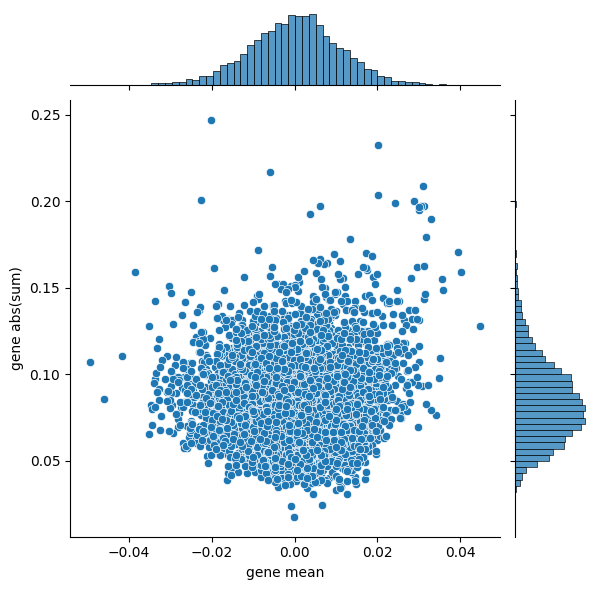

In [16]:
g = sns.jointplot(x='gene mean', y='gene abs(sum)', data=gene_summary)
